- **Name:**
- **Term:**

# Problem Set 002: False Position Method

As you may think, Python has the existing root-finding functions for us to use to make things easy. The function we will use to find the root is *f_solve* from the *scipy.optimize*. 

The *f_solve* function takes in many arguments that you can find in the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html), but the most important two is the function you want to find the root, and the initial guess. 

**TRY IT!** Compute the root of the function $f(x) = e^{-x} - x$ using *f_solve*.

In [ ]:
# Install the following package if not yet installed
!pip install scipy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [ ]:
f = lambda x: np.exp(-x) - x

x_root = fsolve(f, 0.5)[0]  # Initial guess of 0.5
print("Root: " + str(x_root))

We know that this function has one root $x = 0.56714329$, therefore, we can get the root out fairly simple using the *f_solve* function. 

In [ ]:
# Plot the function
x = np.linspace(0, 2, 500)
y = np.exp(-x) - x

plt.figure(figsize=(8, 5))
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.plot(x, y, label=r'$f(x) = e^{-x} - x$', color='blue')
plt.title("Plot of $f(x) = e^{-x} - x$")
plt.xlabel("x")
plt.ylabel("f")
plt.grid(True)
plt.legend()
plt.scatter(x_root, 0, color='red', zorder=3, label=f'Intersection at x = {x_root:.4f}')
plt.text(x_root, 0.05, f'{x_root:.4f}', ha='center', color='red', fontsize=10)
plt.show()

The method of false position, popularly known as the Regula Falsi method, is a numerical approach used in solving nonlinear equations. But this method is especially efficient when the root lies at a particular interval. Here, we will get into the basics of the False Position Method and have a working code in Python.

The Method of False Position is an iteration method that improves the root estimate from function values at the endpoints of the interval. Unlike the bisection method, which breaks away the segment evenly throughout time, the wrong position has a false function value at both corners of the segment to analyze the root. This enhances efficacy than the bisection method in some cases.

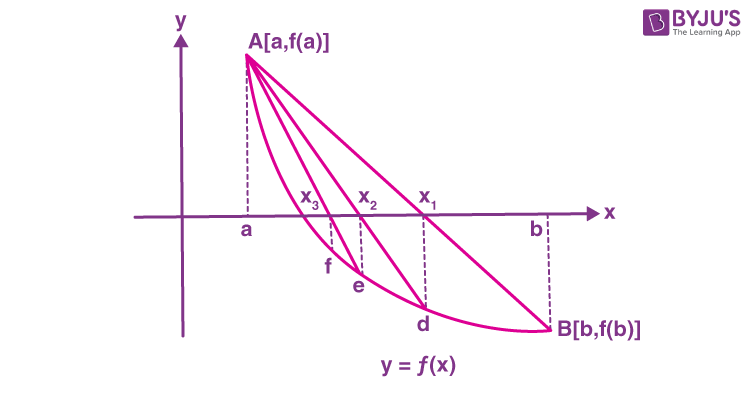

The algorithm for the Method of False Position involves the following steps:

1. Choose an initial interval [a, b] where the root lies.

2. Find values for function values f(a) and f(b), respectively.

3. Compute the estimate of the root using the formula:

4. Evaluate the function at the new estimate, i.e., f(c).

5. Update the interval [a, b] depending on the sign of f(c).

- If f(c) has the same sign as f(a), update a= c.
- If f(c) has the same sign as f(b), update b= c.
- If f(c) is close to zero, the solution has been found and the algorithm terminates.

6. Perform steps 3-5 iteratively until the desired level of accuracy is obtained.

**Function:** Program a function *false_position(f, a, b, tol)* that approximates a root $root$ of $f$. 

In [ ]:
# Implement the False Position Method (Regula Falsi)
def false_position(f, a, b, tol=1e-6, max_iter=100):
    """
    Approximates a root of f bounded by a and b using the False Position Method.
    
    Parameters:
        f (function): The function for which the root is to be found.
        a (float): The lower bound of the interval.
        b (float): The upper bound of the interval.
        tol (float): Tolerance for stopping criterion.
        max_iter (int): Maximum number of iterations.

    Returns:
        float: Approximate root of f.
        int: Number of iterations.
    """
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have opposite signs")

    iter_count = 0
    c = a  # Initializing c to avoid reference issues

    while iter_count < max_iter:
        # Compute c using the False Position formula
        c = b - (f(b) * (b - a)) / (f(b) - f(a))

        print(f"Iteration {iter_count + 1}: x = {c:.6f}, f(x) = {f(c):.6f}")

        # Check stopping condition
        if abs(f(c)) < tol:
            break

        # Update interval
        if f(a) * f(c) < 0:
            b = c  # Root is between a and c
        else:
            a = c  # Root is between c and b

        iter_count += 1

    return c, iter_count  # Return the computed root and iteration count

# Define the function
f = lambda x: np.exp(-x) - x

# Apply the False Position method
root_false_position, iter_false_position = false_position(f, 0, 1)

# Print the final root value
print(f"\nFalse Position Method: Root = {root_false_position:.6f}, Iterations = {iter_false_position}")

In [ ]:
# Generate x values for plotting
x = np.linspace(0, 1.5, 500)
y = np.exp(-x) - x

# Plot the function
plt.figure(figsize=(8, 5))
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.plot(x, y, label=r'$f(x) = e^{-x} - x$', color='blue')

# Highlight the root
plt.scatter(root_false_position, 0, color='red', zorder=3, label=f'Root at x = {root_false_position:.4f}')
plt.text(root_false_position, 0.05, f'{root_false_position:.4f}', ha='center', color='red', fontsize=10)

# Labels and grid
plt.title("False Position Method Applied to $f(x) = e^{-x} - x$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

# Print the root value
print("Root =", root_false_position)